<a href="https://colab.research.google.com/github/drksrao/Customer-Segmentation-using-KMeans/blob/main/DWM_PRACTICAL_11_Customer_Segmentation_by_spend_K_Means_%26_Silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/CLV.csv')

In [ ]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [ ]:
len(dataset) # of rows

303

In [ ]:
dataset.describe().transpose() #descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


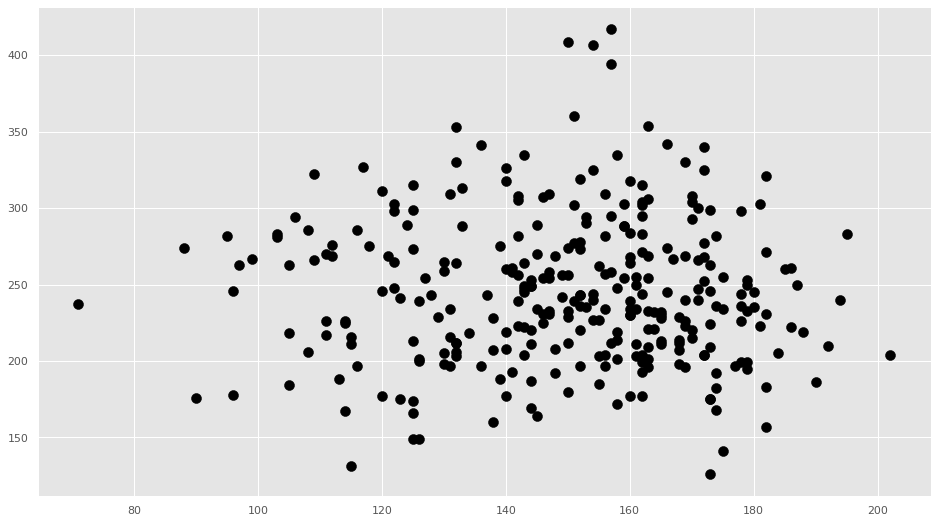

In [ ]:
# Plotting the values to understand the spread
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Spend, Income)))
plt.scatter(Spend, Income, c='black', s=100)

Clustering fundamentals

In [ ]:
X=dataset.iloc[:,[1,0]].values

Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.


b= average inter-cluster distance i.e the average distance between all clusters.


https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric,that%20the%20distance%20between%20clusters%20is%20not%20significant.

In [ ]:
#Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.44006694211403197
For n_clusters=3, The Silhouette Coefficient is 0.35962629048722355
For n_clusters=4, The Silhouette Coefficient is 0.35271446789203426
For n_clusters=5, The Silhouette Coefficient is 0.352199348445336
For n_clusters=6, The Silhouette Coefficient is 0.35975391689328834
For n_clusters=7, The Silhouette Coefficient is 0.34243513724353053
For n_clusters=8, The Silhouette Coefficient is 0.3550690999871027
For n_clusters=9, The Silhouette Coefficient is 0.3571058690968206
For n_clusters=10, The Silhouette Coefficient is 0.35707996779551043


In [ ]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 868805.4785478548
k: 2  cost: 416914.67764462065
k: 3  cost: 297101.3764201944
k: 4  cost: 235568.75630353508
k: 5  cost: 193333.5116727564
k: 6  cost: 158999.20745160058
k: 7  cost: 135314.10167803383
k: 8  cost: 115686.57935998775
k: 9  cost: 102546.93727877043
k: 10  cost: 91556.28599714939



In [ ]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

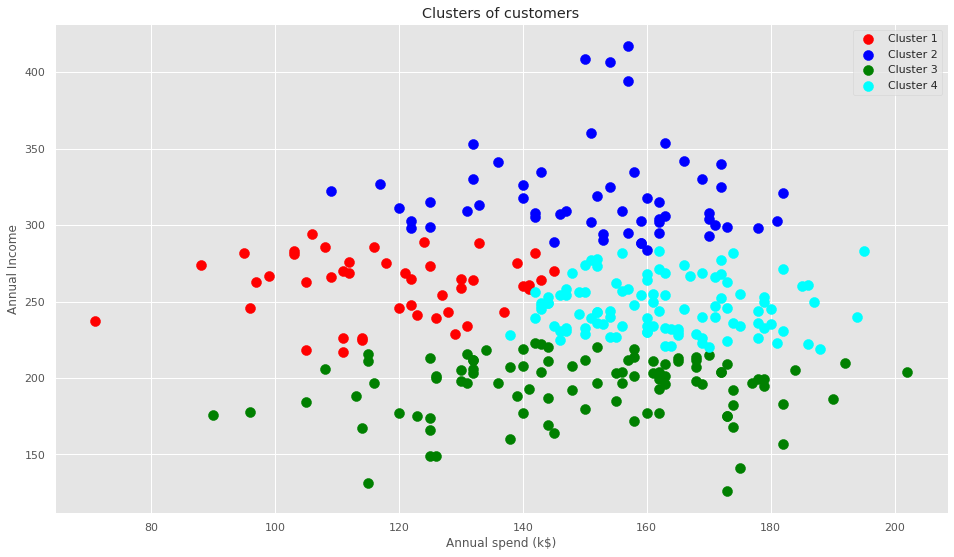

In [ ]:
# Visualising the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_means == 5, 0], X[y_means == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual spend (k$)')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

In [ ]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


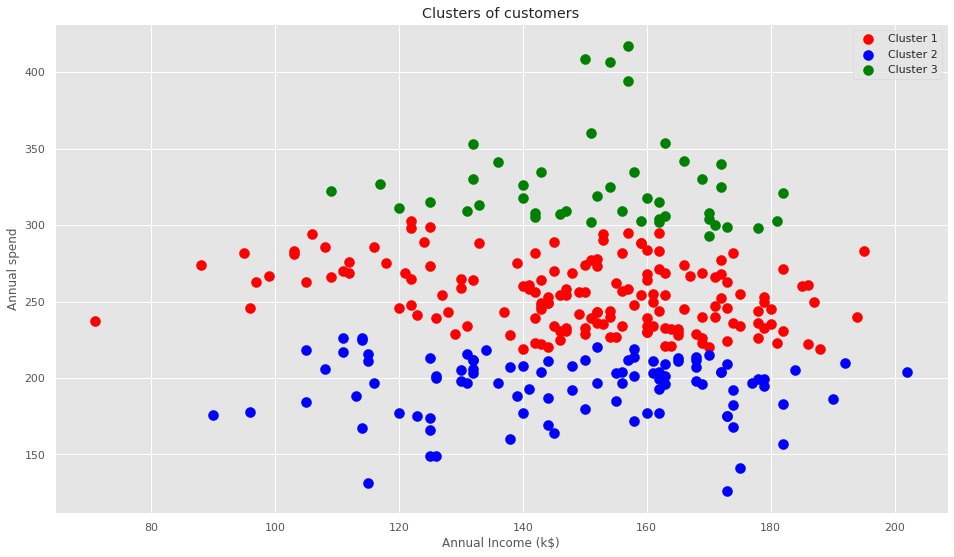

In [ ]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
#To run clustering algorithm we are generating 100 random points.

X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


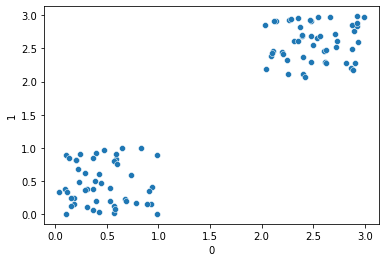

In [ ]:
#Plotting the data:

sns.scatterplot(Z[0],Z[1])

In [ ]:
#Applying KMeans Clustering with 2 clusters:

KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [ ]:
#Calculating the silhouette score:

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8232419236009857


We can say that the clusters are well apart from each other as the silhouette score is closer to 1.

To check whether our silhouette score is providing the right information or not let’s create another scatter plot showing labelled data points.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


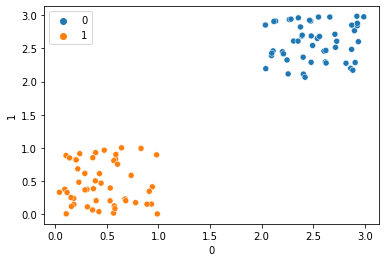

In [ ]:
sns.scatterplot(Z[0],Z[1],hue=label)

It can be seen clearly in the above figure that each cluster is well apart from each other.

Let’s try with 3 clusters:

Silhouette Score(n=3): 0.6219996262502034


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


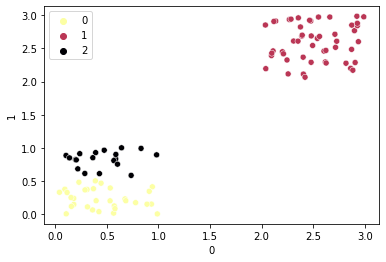

In [ ]:
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
sns.scatterplot(Z[0],Z[1],hue=label,palette='inferno_r')

As you can see in the above figure clusters are not well apart. The inter cluster distance between cluster 1 and cluster 2 is almost negligible. That is why the silhouette score for n= 3(0.596) is lesser than that of n=2(0.806).

When dealing with higher dimensions, the silhouette score is quite useful to validate the working of clustering algorithm as we can’t use any type of visualization to validate clustering when dimensions are greater than 3.

We can also use the silhouette score to check the optimal number of clusters. In the above example, **we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of 3 clusters.**